<h1 style="color: #FF8C00;">00 |</h1>

In [1]:
# Basic Libraries
import os
import numpy as np
import pandas as pd
from collections import Counter

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

<h1 style="color: #FF8C00;">01 | Data Extraction and EDA</h1>

In [2]:

dataset_path = '/Users/fmalacrida/.keras/datasets/recycling/images'

# count images in each category and subcategory
def count_images(base_path):
    data = []
    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        if os.path.isdir(category_path):
            for subfolder in ['default', 'real_world']:
                subfolder_path = os.path.join(category_path, subfolder)
                if os.path.isdir(subfolder_path):
                    num_images = len([file for file in os.listdir(subfolder_path) if file.endswith('.png')])
                    data.append({'Category': category, 'Type': subfolder, 'Image_Count': num_images})
    return pd.DataFrame(data)

df_counts = count_images(dataset_path)


df_counts

,Category,Type,Image_Count
0,disposable_plastic_cutlery,default,250
1,disposable_plastic_cutlery,real_world,250
2,food_waste,default,250
3,food_waste,real_world,250
4,office_paper,default,250
5,office_paper,real_world,250
6,glass_food_jars,default,250
7,glass_food_jars,real_world,250
8,aluminum_soda_cans,default,250
9,aluminum_soda_cans,real_world,250


<h1 style="color: #FF8C00;">02 | Modeling</h1>

<h2 style="color: #FF6347;">CNN</h2>

In [3]:
dataset_path = '/Users/fmalacrida/.keras/datasets/recycling/images'

# image preprocessing
image_size = (128, 128)
batch_size = 32

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Found 12000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.
Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.0680 - loss: 3.3495 - val_accuracy: 0.1833 - val_loss: 2.9170
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.1681 - loss: 2.9466 - val_accuracy: 0.2747 - val_loss: 2.5460
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.2386 - loss: 2.6924 - val_accuracy: 0.3583 - val_loss: 2.2959
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.2887 - loss: 2.5100 - val_accuracy: 0.3873 - val_loss: 2.1886
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.3260 - loss: 2.3589 - val_accuracy: 0.4193 - val_loss: 2.1106
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.3516 - loss: 2.2622 - val_accuracy: 0.4453 - val_loss: 1.9793
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.3634 - loss: 2.1881 - val_accuracy: 0.4400 - val_loss: 2.0059
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - accuracy: 0.3908 - loss: 2.1282 - val

In [4]:
# save the model
model.save('waste_classification_model.keras')

<h2 style="color: #FF6347;">MobileNetV2</h2>

In [5]:
dataset_path = '/Users/fmalacrida/.keras/datasets/recycling/images'

# image preprocessing
image_size = (224, 224)
batch_size = 32

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=30,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2]
)

train_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=19,
    validation_data=validation_generator
)

Found 12000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.
Epoch 1/19
375/375 ━━━━━━━━━━━━━━━━━━━━ 92s 241ms/step - accuracy: 0.0607 - loss: 3.7126 - val_accuracy: 0.3893 - val_loss: 2.6775
Epoch 2/19
375/375 ━━━━━━━━━━━━━━━━━━━━ 89s 238ms/step - accuracy: 0.2355 - loss: 2.7925 - val_accuracy: 0.5553 - val_loss: 1.8278
Epoch 3/19
375/375 ━━━━━━━━━━━━━━━━━━━━ 90s 239ms/step - accuracy: 0.3541 - loss: 2.2789 - val_accuracy: 0.6130 - val_loss: 1.4435
Epoch 4/19
375/375 ━━━━━━━━━━━━━━━━━━━━ 90s 241ms/step - accuracy: 0.4329 - loss: 1.9843 - val_accuracy: 0.6440 - val_loss: 1.2781
Epoch 5/19
375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 230ms/step - accuracy: 0.4707 - loss: 1.8150 - val_accuracy: 0.6703 - val_loss: 1.1685
Epoch 6/19
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 222ms/step - accuracy: 0.5083 - loss: 1.6675 - val_accuracy: 0.6883 - val_loss: 1.0891
Epoch 7/19
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 222ms/step - accuracy: 0.5381 - loss: 1.5775 - val_accuracy: 0.6977 - val_loss: 1.0

In [19]:
model.save('/Users/fmalacrida/Downloads/waste_classification_mobilenetv2.keras')

<h2 style="color: #FF6347;">MobileNetV2 Hyperparameter</h2>

In [23]:
model = load_model('/Users/fmalacrida/Downloads/waste_classification_mobilenetv2.keras')


In [24]:
validation_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Prevents misalignment
)

Found 3000 images belonging to 30 classes.


In [25]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
# unfreeze the last 20 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 91s 240ms/step - accuracy: 0.6375 - loss: 1.1774 - val_accuracy: 0.7517 - val_loss: 0.8048
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 88s 235ms/step - accuracy: 0.6486 - loss: 1.1553 - val_accuracy: 0.7607 - val_loss: 0.7914
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 226ms/step - accuracy: 0.6400 - loss: 1.1722 - val_accuracy: 0.7527 - val_loss: 0.8042
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - accuracy: 0.6481 - loss: 1.1401 - val_accuracy: 0.7503 - val_loss: 0.7902
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - accuracy: 0.6413 - loss: 1.1617 - val_accuracy: 0.7553 - val_loss: 0.7898
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 218ms/step - accuracy: 0.6457 - loss: 1.1762 - val_accuracy: 0.7500 - val_loss: 0.8170
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - accuracy: 0.6430 - loss: 1.1768 - val_accuracy: 0.7513 - val_loss: 0.7920
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - accuracy: 0.6423 - loss: 1

<h1 style="color: #FF8C00;">03 | Reporting</h1>

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step

Classification Report for Fine-Tuned MobileNetV2:

                            precision    recall  f1-score   support

              aerosol_cans       0.71      0.80      0.75       100
        aluminum_food_cans       0.48      0.32      0.39       100
        aluminum_soda_cans       0.63      0.63      0.63       100
           cardboard_boxes       0.54      0.82      0.65       100
       cardboard_packaging       0.51      0.36      0.42       100
                  clothing       0.89      0.76      0.82       100
            coffee_grounds       0.91      0.95      0.93       100
disposable_plastic_cutlery       0.89      0.78      0.83       100
                 eggshells       0.95      0.88      0.91       100
                food_waste       0.93      0.89      0.91       100
    glass_beverage_bottles       0.68      0.76      0.72       100
 glass_cosmetic_containers       0.69      0.80      0.74       100
           glass_food

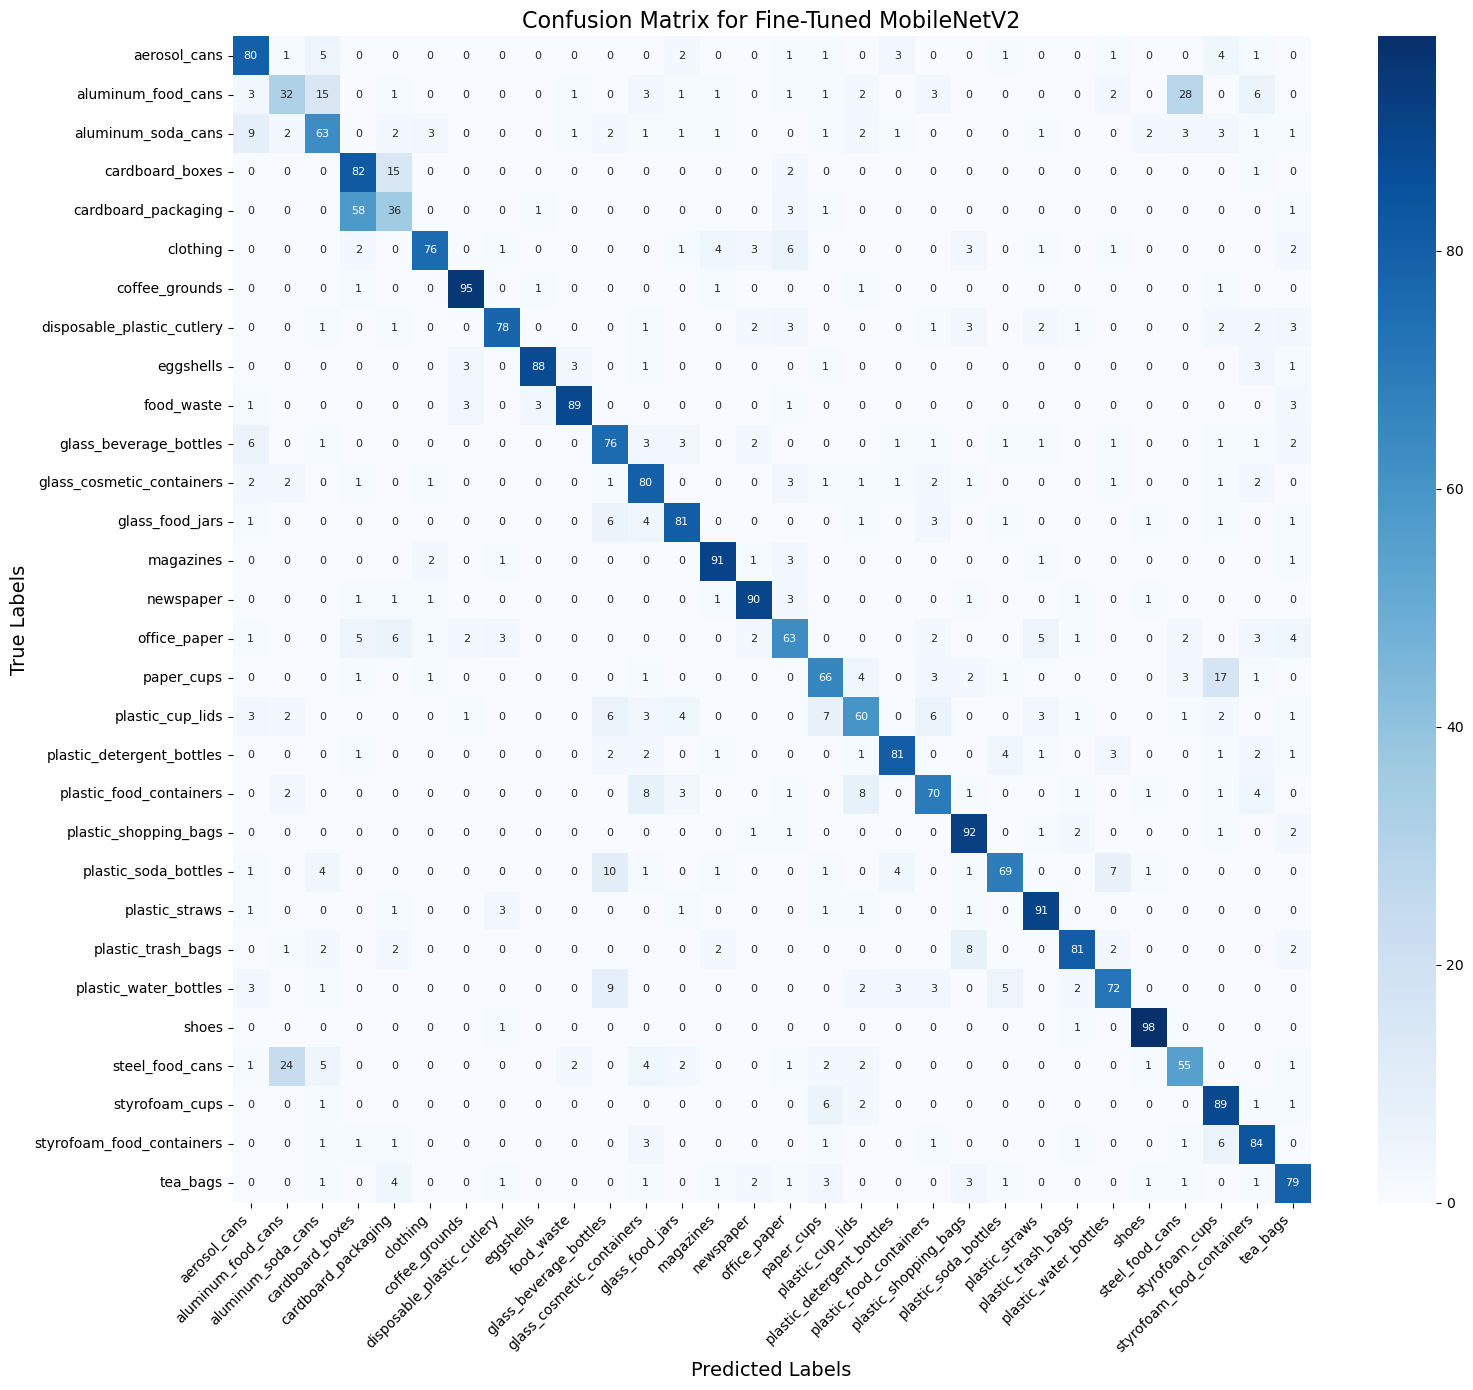

Fine-Tuned MobileNetV2 Accuracy: 76.23%



In [14]:
# function to evaluate the model and plot an improved confusion matrix
def evaluate_model(model, generator, model_name="Model"):
    # predict classes
    predictions = model.predict(generator, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # true labels
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())
    
    # classification Report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    
    # confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    
    plt.figure(figsize=(16, 14))  # Larger figure for better readability
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels,
                annot_kws={"size": 8})  # Smaller annotations to avoid clutter
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%\n")

evaluate_model(model, validation_generator, model_name="Fine-Tuned MobileNetV2")

<h1 style="color: #FF8C00;">04 | Testing the Model</h1>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1.jpeg → Predicted as: aerosol_cans
6.jpeg → Predicted as: aerosol_cans
7.jpeg → Predicted as: aluminum_food_cans
8.jpeg → Predicted as: shoes
4.jpg → Predicted as: aluminum_soda_cans
5.jpg → Predicted as: glass_beverage_bottles
2.png → Predicted as: shoes
3.jpeg → Predicted as: plastic_water_bottles


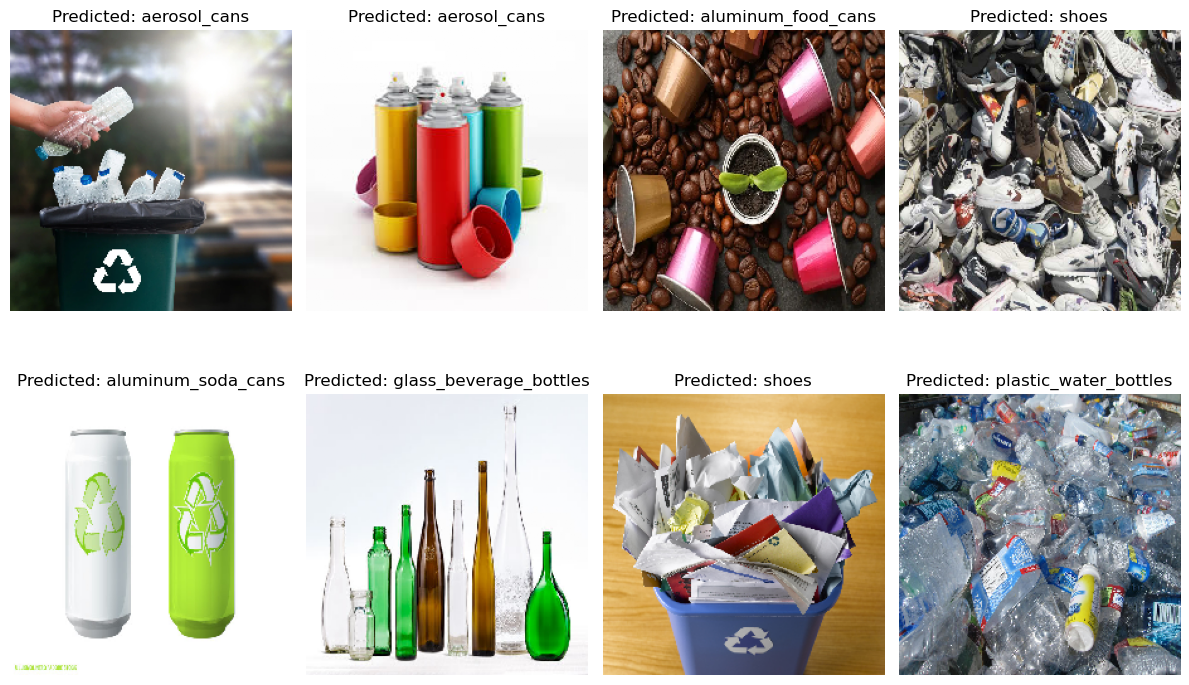

In [ ]:
test_dir = "/Users/fmalacrida/Downloads/recycling/test"

# function to load and preprocess test images
def load_test_images(test_dir):
    images = []
    image_names = []
    for img_file in os.listdir(test_dir):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_dir, img_file)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img) / 255.0
            images.append(img_array)
            image_names.append(img_file)
    return np.array(images), image_names

# load images
test_images, image_names = load_test_images(test_dir)

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# map predictions back to class labels
class_labels = list(train_generator.class_indices.keys())

# show predictions for each image
for img_name, pred in zip(image_names, predicted_classes):
    print(f"{img_name} → Predicted as: {class_labels[pred]}")

# plot the test images with predictions
plt.figure(figsize=(12, 8))
for i in range(min(8, len(test_images))):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
